## 3.2 Gradient Descent

Loss function $$J(w) = \frac{1}{n} \sum \limits_{i=1} ^{n} (y^{i}-\hat{y^{i}})^2 $$
where n is the number of samples, $y^{i}$ are the observed values, $\hat{y^{i}}$ are the predicted values

In [1]:
import pickle
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [2]:
## load data
def load_data():
    df = pd.read_csv('normalized.txt', header=None)
    df.columns = ['area', 'bdrm', 'price']
    df ['intercept'] = 1
    X = df[['intercept', 'area', 'bdrm']].values
    y = df['price'].values
    return X, y

In [3]:
def compute_error(pred, truth):
    # compute the mean squared error
    
    ## to do
    n = len(pred)
    diff = np.subtract(truth,pred)
    diff_T = np.transpose(diff)
    error = 1/n * np.dot(diff_T,diff)
    return error
    
    

In [4]:
def compute_grad(X,y,w):
    # compute the gradient
    
    ## to do
    
    n = np.shape(X)[0]
    m = np.shape(X)[1]
    gradient = np.zeros((3,1),dtype=np.float32)
#     print("shape of X:{},shape of y:{}, shape of w:{}".format(np.shape(X),np.shape(y),np.shape(w)))
    
    WTX2 = ((X.T).dot(X)).dot(w)
    YX = y.T.dot(X).reshape(3,1)
    gradient = (2/n) * (WTX2 - YX)
#     print("inside gradient function:",gradient)
    return gradient

In [7]:
## training with gradient descent
def train(X, y, learning_rate, max_num_iter=1000):
    """
    write a function which apply Gradient descent to estimate parameter w
    Please also record the mean squared error in the iteration process and save it to error history
    """
    error_history = []
    
    # initialize w
    num_dim = np.shape(X)[1]
    w = np.zeros((num_dim, 1), dtype=np.float32)
    
    # ensure dimension is 2-dim
    y = y.reshape(y.shape[0], 1)
    
    
    
    for steps in range(max_num_iter):
        # compute gradient descent over all training examples
        # perform gradient descent (vector update)
        # get predictions
        # compute MSE and add it into error_history
        
        ## to do
        grad = compute_grad(X,y,w)
#         print("grad:",grad)
        to_sub = learning_rate*grad
#         print("shape of to_sub:",np.shape(to_sub))
#         print(np.shape(w))
        w = np.subtract(w,to_sub)
#         print(np.shape(w))
        pred = np.dot(X,w)
        mse = compute_error(pred,y)
#         print("shape of mse:{}".format(np.shape(mse)))
#         print("type of mse:",type(mse))
        error_history.append(mse[0,0])
#         print("w:{},mse:{}".format(w,mse))
        
    return w, error_history

test (100,)


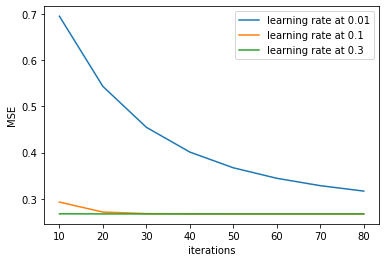

min index at: 2


In [8]:
## fit regression model and plot the MSE/SSE vs. number of iterations
X, y = load_data()

## to do
w1,errors1 = train(X,y,0.01,100)
# print("test",np.shape(errors1))
plt.plot([i*10 for i in range(1,9)], [errors1[i] for i in range(10,81,10)],label="learning rate at 0.01")

w2,errors2 = train(X,y,0.1,100)
plt.plot([i*10 for i in range(1,9)], [errors2[i] for i in range(10,81,10)],label="learning rate at 0.1")


w3,errors3 = train(X,y,0.3,100)
MSES = [errors1[-1],errors2[-1]]
plt.plot([i*10 for i in range(1,9)], [errors3[i] for i in range(10,81,10)],label="learning rate at 0.3")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("MSE")
plt.show()
MSES = [errors1[-1],errors2[-1],errors3[-1]]
print("min index at:",MSES.index(min(MSES)))

## 3.3 Make prediction based on the linear regression model you get

In [9]:
# get the values used for normalization
f = open('mean_std.pk', 'rb')
norm_params = pickle.load(f)
l, b, p = norm_params['area'], norm_params['n_bedroom'], norm_params['price']
print(l["mean"])
f.close()

2000.6808510638298


In [10]:
# first normalize the features and then make predictions

## to do
size = 3150
bed = 4

std_size = l["std"]
mean_size = l["mean"]
std_bed = b["std"]
mean_bed = b["mean"]
n_size = (size-mean_size)/std_size
n_bed = (bed-mean_bed)/std_bed

new_X = np.array([1,n_size,n_bed])
pred_price = new_X.dot(w3)

std_price = p["std"]
mean_price = p["mean"]

pred_price = pred_price * std_price +mean_price
# print out the predicted value
print("The w is {}, and pred_price is {}\n".format(w3, pred_price))

The w is [[-7.94997730e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]], and pred_price is [493159.45624901]

